<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Изучение-данных-из-файла" data-toc-modified-id="1.-Изучение-данных-из-файла"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#1.1-Вывод" data-toc-modified-id="1.1-Вывод"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#2.-Предобработка-данных" data-toc-modified-id="2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#3.-Исследовательский-анализ-данных" data-toc-modified-id="3.-Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#3.1-Вывод" data-toc-modified-id="3.1-Вывод"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#4.-Составим-портрет-пользователя-каждого-региона" data-toc-modified-id="4.-Составим-портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составим-портрет-пользователя-каждого-региона</a></span></li><li><span><a href="#5.-Проверка-гипотез" data-toc-modified-id="5.-Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка-гипотез</a></span></li><li><span><a href="#6.-Общий-вывод" data-toc-modified-id="6.-Общий-вывод"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий-вывод</a></span></li></ul></div>

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## 1. Изучение данных из файла

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import numpy as np
import seaborn as sns

<div class="alert alert-info">
 <font color='Blue'>
     <b>Открываем файл с данными и изучаем общую информацию:

In [64]:
df=pd.read_csv('/datasets/games.csv') # открываем файл games.csv
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-info">
 <font color='Blue'>
     <b>Посчитаем долю пропущенных данных в столбцах, путем суммирования количества заполненных ячеек и делением его на все ячейки

In [65]:
missing_in_Name = df['Name']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце Name:',"{:.2%}".format(missing_in_Name))
missing_in_Genre = df['Genre']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце Genre:',"{:.2%}".format(missing_in_Genre))
missing_in_Year_of_Release = df['Year_of_Release']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце Year_of_Release:',"{:.2%}".format(missing_in_Year_of_Release))
missing_in_Critic_Score = df['Critic_Score']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце Critic_Score:',"{:.2%}".format(missing_in_Critic_Score))
missing_in_User_Score = df['User_Score']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце User_Score:',"{:.2%}".format(missing_in_User_Score))
missing_in_Rating = df['Rating']. isnull(). sum() / len(df)
print('Доля пропущенных в столбце Rating:',"{:.2%}".format(missing_in_Rating))

Доля пропущенных в столбце Name: 0.01%
Доля пропущенных в столбце Genre: 0.01%
Доля пропущенных в столбце Year_of_Release: 1.61%
Доля пропущенных в столбце Critic_Score: 51.32%
Доля пропущенных в столбце User_Score: 40.09%
Доля пропущенных в столбце Rating: 40.48%


In [66]:
##КОД РЕВЬЮЕРА
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000


<div class="alert alert-info">
 <font color='Blue'>
     <b>Посчитаем количество пустых значений:

In [67]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### 1.1 Вывод

<div class="alert alert-info">
 <font color='Blue'>
     <b>Выявили пропущенные значения:</b>
        <p>
- Name: 0.01% (название игры) -  можно удалить
        <p>
- Genre: 0.01% (жанр игры) -  можно удалить
        <p>
- Year_of_Release: 1.61% (год выпуска) -  можно удалить
            <p>
- Critic_Score: 51.32% (оценка критиков (максимум 100)) 
                <p>
- User_Score: 40.09%  (оценка пользователей (максимум 10)) 
                    <p>
- Rating: 40.48% (рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.) -  <b>заполнять пропуски в столбцах "Critic_Score", "User_Score" и "Rating" будет не корректно, так как повлияет на статистические данныезначениями <p>
      <b>Предположительно,появление пропусков данных вызвано отсутствием информации. Можем сообщить о проблеме заказчику и запросить данные для дальнейшего анализа   <p>
      

<div class="alert alert-block alert-info">
<b>Заполнил пропуски на 'no rating' в столбце rating:</b>
</div>

In [68]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [69]:
df['Rating']=df['Rating'].fillna('no rating')

In [70]:
df['Rating'].value_counts()

no rating    6766
E            3990
T            2961
M            1563
E10+         1420
EC              8
K-A             3
RP              3
AO              1
Name: Rating, dtype: int64

In [71]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating


## 2. Предобработка данных

<div class="alert alert-info">
<font color='Blue'>
    <b>Привожу к нижнему регистру название столбцов и данные в четырёх столбцах 'name','platform','genre' и 'rating'со значениями "str"

In [72]:
df.columns = map(str.lower, df.columns)
for column in df[['name','platform','genre','rating']]:
    df[column] = df[column].str.lower()

<div class="alert alert-info">
<font color='Blue'>
    <b>Удаляю пропуски в столбцах "name", "year_of_release", "genre" так как маленькое количество и нет вариантов для замены 

In [73]:
df.dropna(subset=['name', 'genre','year_of_release'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<div class="alert alert-info">
<font color='Blue'>
    <b>Проверяю столбцы с пропусками:

In [74]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no rating
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,no rating
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,no rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,no rating
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating


In [75]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no rating
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,no rating
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,no rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,no rating
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating


In [76]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<div class="alert alert-info">
<font color='Blue'>
    <b>Проверю наличие дубликатов

In [77]:
df.duplicated().sum() 

0

In [78]:
df[df.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,need for speed: most wanted,x360,2005.0,racing,1.0,0.13,0.02,0.10,83.0,8.5,t
11715,need for speed: most wanted,pc,2012.0,racing,0.0,0.06,0.00,0.02,82.0,8.5,t
16230,madden nfl 13,ps3,2012.0,sports,0.0,0.01,0.00,0.00,83.0,5.5,e


<div class="alert alert-info">
<font color='Blue'>
    <b>Ппривожу данные в столбце "year_of_release" типу "int"

In [79]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating


In [80]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no rating
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,no rating
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,no rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,no rating
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating


<div class="alert alert-info">
<font color='Blue'>
<b> В столбце "user_score" имеется аббревиатура "tbd" - to be done (будет сделано), заменяю на NaN, что бы не мешало для дальнейшего статистического анализа:   

In [81]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)
df['user_score'] = df['user_score'].astype(float)
df['user_score'].dtype

dtype('float64')

<div class="alert alert-info">
<font color='Blue'>
    <b> Посчитаем суммарные продажи во всех регионах и запишу в отдельный столбец:

In [82]:
#Создаю новый столбец total_sales и прибавляю продажи всех столбцов
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


## 3. Исследовательский анализ данных

<div class="alert alert-info">
<font color='Blue'>

   <b>Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

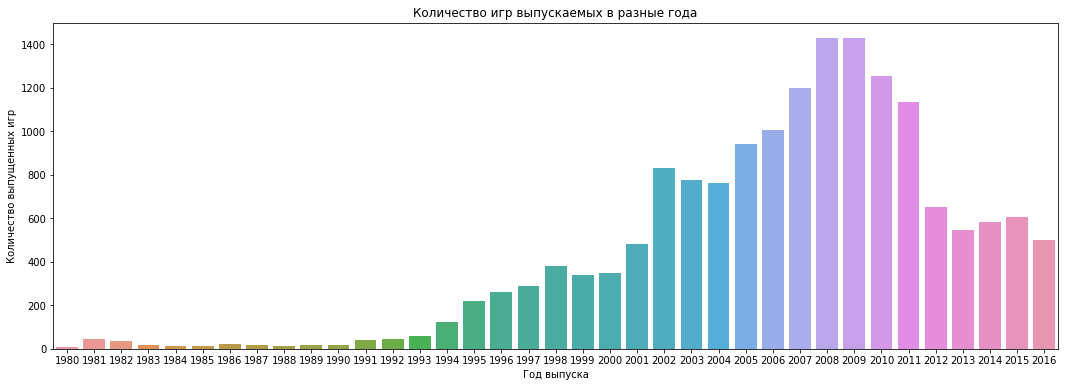

In [83]:
# Методом pivot отсортируем таблицы и построим график
games_per_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
plt.figure(figsize=(18, 6))
sns.barplot(data = games_per_years, x='year_of_release', y='name')
plt.title("Количество игр выпускаемых в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show()


<div class="alert alert-block alert-info">
<b>Добавил plt.show()</b>
</div>

<div class="alert alert-info">
<font color='Blue'> <b>Вывод:</b>
    <p>
    По графику видно, что количество игр начинает расти с 1991 года до 2008-2009 годов, после чего заметно снижение количества игр и стабилизация примерно на одном уровне в 2012-2016 годах.
        <p> Данные с 1980 по 1990 не сильно менялись и были значительно ниже количества игр с 1991 и для планирования компании на 2017 год эти данные не важны.

<div class="alert alert-info">
<font color='Blue'>

   <b> Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Text(0, 0.5, 'Количество продаж')

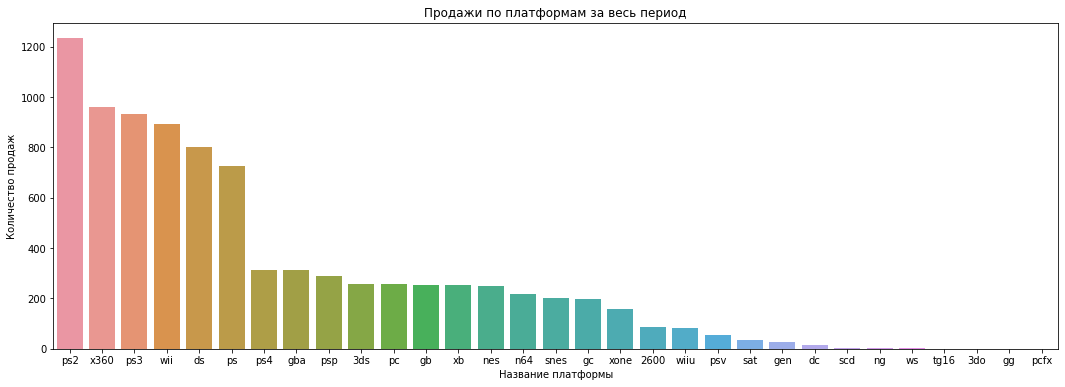

In [84]:
platform_sales_sum = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(18,6))
sns.barplot(x=platform_sales_sum.index,y=platform_sales_sum['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

<div class="alert alert-info">
<font color='Blue'> <b>Вывод:</b>
    <p>
    По графику видно, что есть шесть игровых платфор, которые самые популярные, это top_6: <b>ps2, x360, ps3, wii, ds и ps.

<div class="alert alert-info">
<font color='Blue'>

   <b> Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. <p></b>
       Не будем учитывать в работе данные за предыдущие годы.  <p>
    <b> Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ. 

In [85]:
# Построю таблицу и графики по платформам и их обшим продажам по убыванию для top_6.
top_6_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
top_6_platforms = top_6_platforms.reset_index().rename_axis(None, axis=1)
top_6_platforms

,platform,total_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58


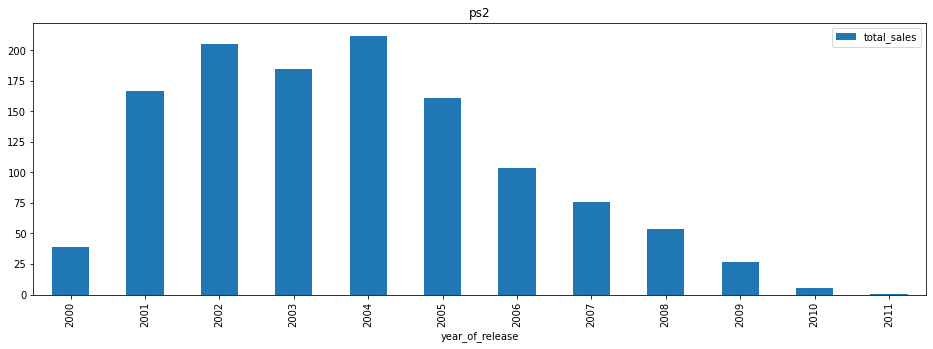

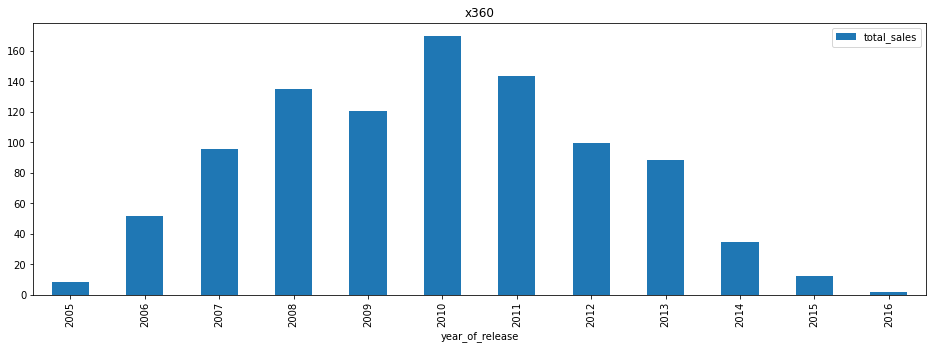

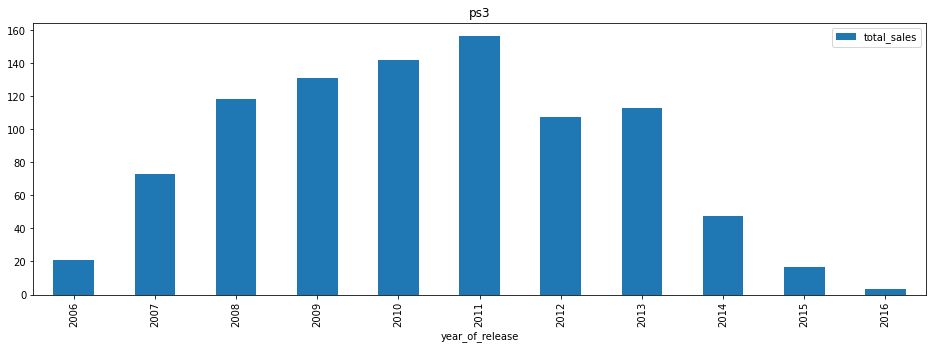

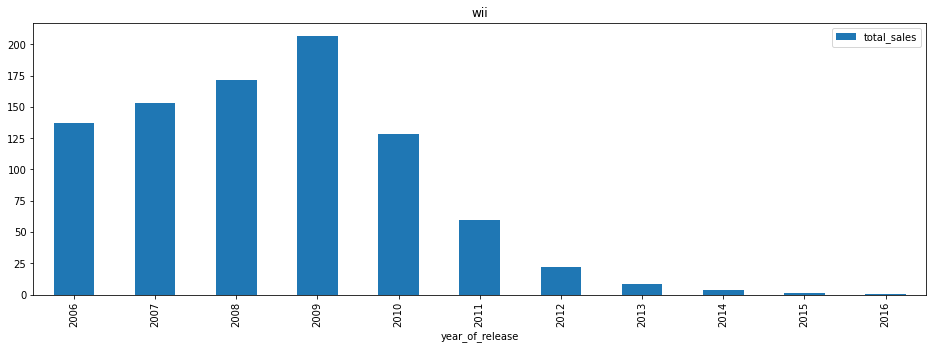

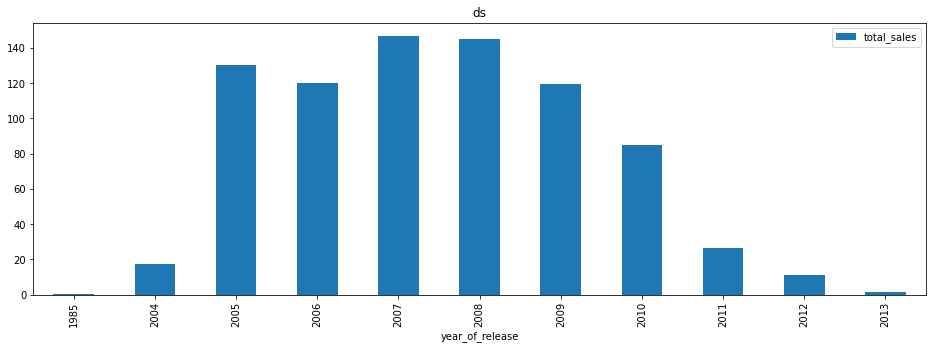

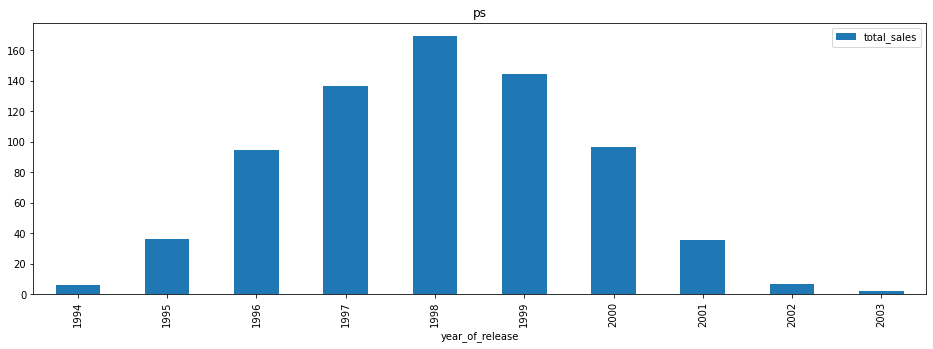

In [86]:

top_6_platforms = top_6_platforms['platform'].unique() #создадим словарь наиболее прибыльных платформ
for platform in top_6_platforms:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(16,5))
    plt.title(platform)

In [140]:
tmp1=df.query('year_of_release>2010')
tmp = tmp1.pivot_table(index="year_of_release",columns= "platform",values= "total_sales")
tmp.head(5)



platform,3ds,ds,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,,
2011,0.544828,0.171111,0.252014,0.064286,0.729209,NaN,0.128201,0.257222,0.417133,NaN,0.698252,NaN
2012,0.552258,0.478696,0.380656,NaN,0.725405,NaN,0.072547,0.305472,0.700323,0.548750,0.940943,NaN
2013,0.621648,0.192500,0.325789,NaN,0.898810,1.624375,0.058148,0.168095,0.715833,0.515476,1.181067,0.997895
2014,0.547000,NaN,0.282553,NaN,0.442222,1.333333,0.024000,0.119000,0.625000,0.710645,0.551429,0.886393
2015,0.323023,NaN,0.170400,NaN,0.230411,0.867883,0.040000,0.056818,0.285000,0.583929,0.341714,0.751750


<AxesSubplot:xlabel='year_of_release'>

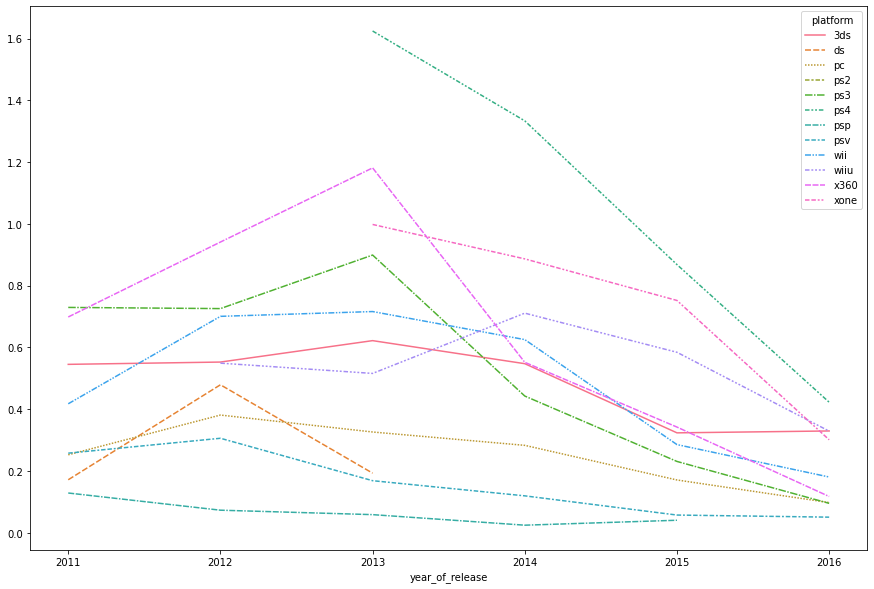

In [141]:
plt.rcParams['figure.figsize']=(15,10)
sns.lineplot(data=tmp)


<div class="alert alert-info">
<font color='Blue'> <b>Вывод:</b>
    <p>
Игровые платформы в среднем существуют около 10 лет <p>
Cамые продаваемые это PS2, x360 и PS3  <p>
Пик продаж игровых платформ наступает в среднем на 4-6 год после выхода <p>
В качестве актуального периода возьму 2006-2016г для прогноза на 2017 год <p>
Платформа ps перестала выпускаться после 2003 года 

<div class="alert alert-block alert-info">
<b>Сделал срез по актуальному периоду:</b>
</div>

In [89]:
df_actual_period=df.query('year_of_release>2014')
df_actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,e,7.60
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,NaN,NaN,no rating,7.39


In [90]:
top_6_platforms_actual_period = df_actual_period.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
top_6_platforms_actual_period

,total_sales
platform,
ps4,188.15
xone,86.29
3ds,42.92
wiiu,20.95
ps3,20.42
pc,13.77


<div class="alert alert-info">
<font color='Blue'>

   <b> Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [91]:
#Сохраним в переменной df_top_5_platforms топ 5 платформ и избавимся от выбросов
list_of_top6 = ['ps4','xone','3ds','wiiu','ps3','pc']
df_top_6_platforms = df[df['platform'].isin(['ps4','xone','3ds','wiiu','ps3','pc'])]
df_top_6_platforms = df_top_6_platforms[df_top_6_platforms['total_sales']<1.4]

In [92]:
df_top_6_platforms['total_sales'].describe()

count    3219.000000
mean        0.260354
std         0.316451
min         0.000000
25%         0.040000
50%         0.120000
75%         0.370000
max         1.390000
Name: total_sales, dtype: float64

Text(0, 0.5, 'Глобальные продажи')

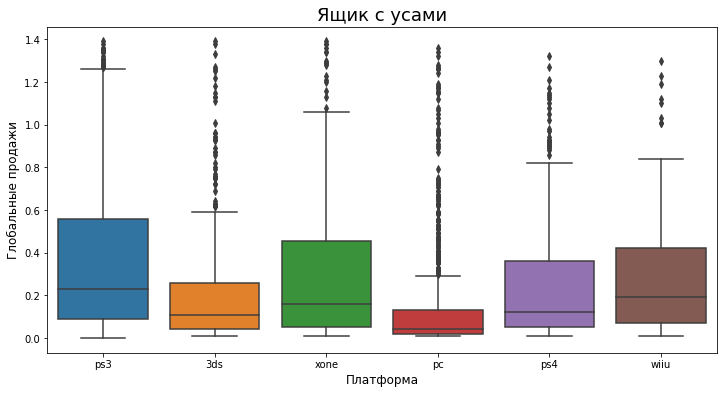

In [93]:
#Отрисуем ящики с усами 
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_6_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=18)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

<div class="alert alert-info">
<font color='Blue'> <b>Вывод:</b>
    <p>
Провели срез данных для того, чтоыб отрисовать ящики с усами. <p>
По графику видно, что медиана у всех имеет разное значение<p>
Больше всех продаж у ps3, потом xone, wiiu, ps4, 3ds и pc на последнем месте. 

<div class="alert alert-info">
   
<font color='Blue'>

   <b> Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

In [94]:
#Корреляция между оценками пользователей и продажами 
ps3 = df_actual_period[df_actual_period['platform']=='ps3']
ps3['user_score'].corr(ps3['total_sales'])

-0.16529542277898507

Text(0.5, 1.0, 'test')

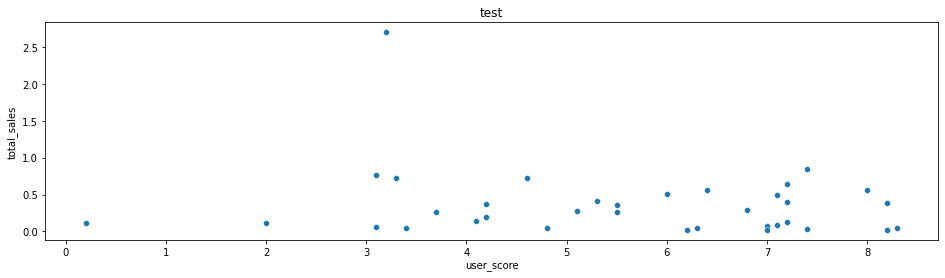

In [95]:
#Построю диаграмму рассеяния по оценкам пользователей
plt.figure(figsize=(16,4))
sns.scatterplot(x='user_score', y='total_sales', data=ps3)
plt.title('test')

<div class="alert alert-info">
<font color='Blue'>

   <b> Соотнесем выводы с продажами игр на других платформах.

In [98]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform_matrix(name_of_platform):
    platform = df_actual_period[df_actual_period['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')

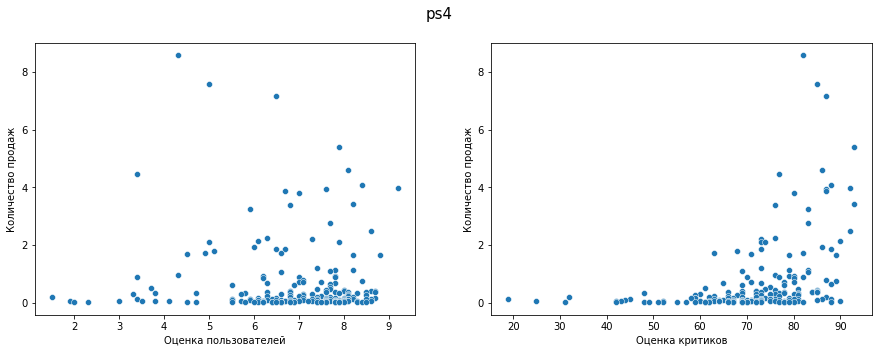

Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.39284855551305986




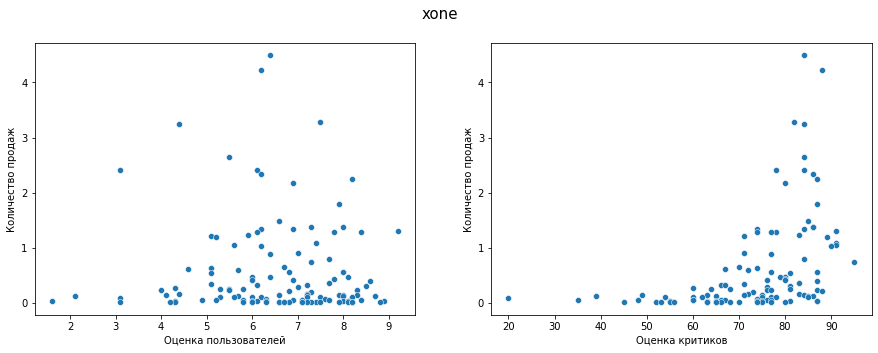

Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.43088874582136805




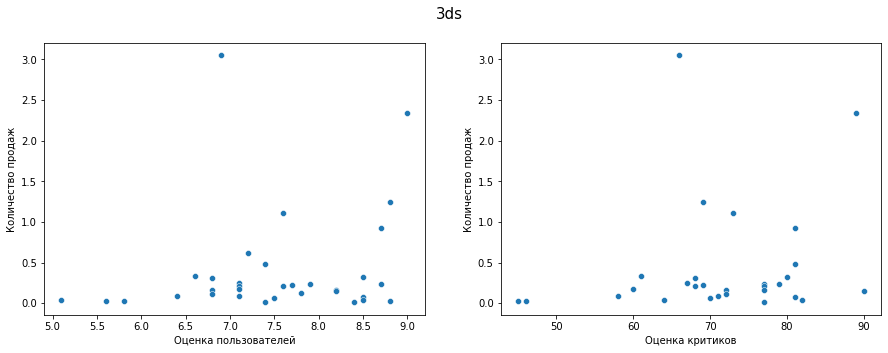

Корреляция между отзывами критиков и игровой платформой  3DS : Слабая 0.17757455046092874
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.19879627008102982




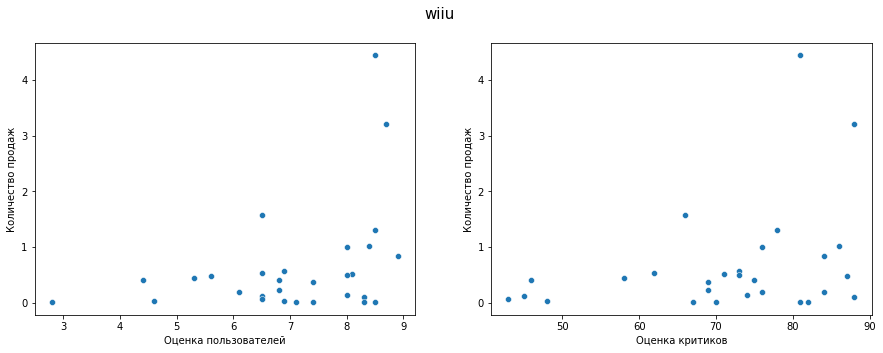

Корреляция между отзывами критиков и игровой платформой  WIIU : Умеренная 0.317045711769622
Корреляция между отзывами пользователей и продажами  WIIU : Умеренная 0.3635185724809445




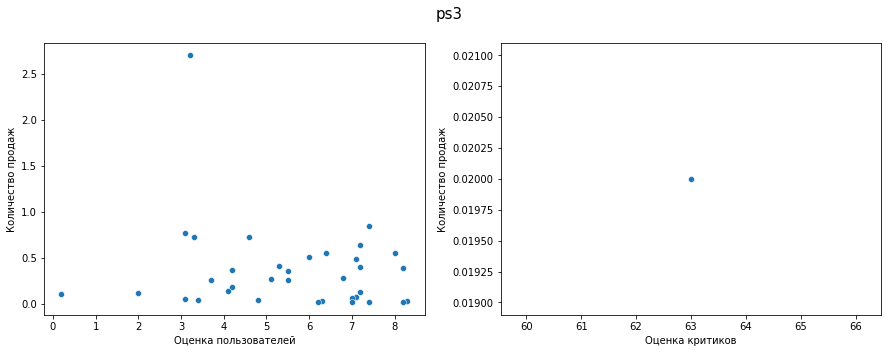

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


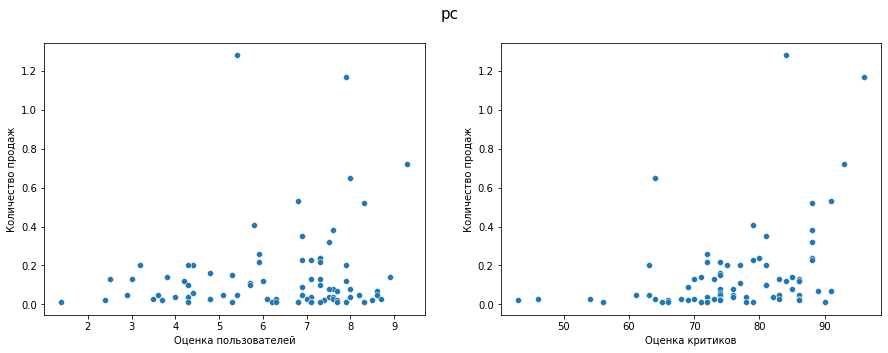

Корреляция между отзывами критиков и игровой платформой  PC : Умеренная 0.3773317477241351
Корреляция между отзывами пользователей и продажами  PC : Слабая 0.15038053045029076




In [99]:
#С помощью цикла выведем графики для top_6
for platform in list_of_top6:
    other_platform_matrix(platform)

<div class="alert alert-block alert-info">
<b>Исправил на актуальные платформы</b>
</div>

In [100]:
#Посчитаю дисперсию, стандартное отклонение, среднее и медиану у top_6 платформ к оценкам пользователей
for platform in list_of_top6:
    print('Дисперсия', platform.upper(),':', np.var(df[df['platform']==platform]['user_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(df[df['platform']==platform]['user_score']))
    print('Среднее',platform.upper(),':',  df[df['platform']==platform]['user_score'].mean())
    print('Медиана',platform.upper(),':',  df[df['platform']==platform]['user_score'].median())
    print('\n')

Дисперсия PS4 : 2.121796544989326
Стандартное отклонение PS4 : 1.4566387832916319
Среднее PS4 : 6.748249027237354
Медиана PS4 : 7.0


Дисперсия XONE : 1.8965188383045526
Стандартное отклонение XONE : 1.377141546212499
Среднее XONE : 6.521428571428572
Медиана XONE : 6.8


Дисперсия 3DS : 2.0111507814370233
Стандартное отклонение 3DS : 1.4181504791230808
Среднее 3DS : 6.85204678362573
Медиана 3DS : 7.1


Дисперсия WIIU : 2.039784
Стандартное отклонение WIIU : 1.4282100685823498
Среднее WIIU : 6.904
Медиана WIIU : 7.1


Дисперсия PS3 : 2.1387598085040085
Стандартное отклонение PS3 : 1.462449933674315
Среднее PS3 : 6.719512195121951
Медиана PS3 : 7.1


Дисперсия PC : 2.346112819613175
Стандартное отклонение PC : 1.5317025884985553
Среднее PC : 7.065960264900661
Медиана PC : 7.5




In [101]:
#Посчитаю дисперсию, стандартное отклонение, среднее и медиану у top_6 платформ к оценкам критиков
for platform in list_of_top6:
    print('Дисперсия', platform.upper(),':', np.var(df[df['platform']==platform]['critic_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(df_actual_period[df_actual_period['platform']==platform]['critic_score']))
    print('Среднее',platform.upper(),':',  df_actual_period[df_actual_period['platform']==platform]['critic_score'].mean())
    print('Медиана',platform.upper(),':',  df_actual_period[df_actual_period['platform']==platform]['critic_score'].median())
    print('\n')

Дисперсия PS4 : 155.28135235575712
Стандартное отклонение PS4 : 12.561166634972878
Среднее PS4 : 71.89189189189189
Медиана PS4 : 73.0


Дисперсия XONE : 166.7994117853016
Стандартное отклонение XONE : 12.803708407316678
Среднее XONE : 73.60714285714286
Медиана XONE : 76.0


Дисперсия 3DS : 154.2164319930324
Стандартное отклонение 3DS : 10.512435306630898
Среднее 3DS : 71.37931034482759
Медиана 3DS : 72.0


Дисперсия WIIU : 213.39555555555555
Стандартное отклонение WIIU : 13.036839481771239
Среднее WIIU : 71.42857142857143
Медиана WIIU : 73.5


Дисперсия PS3 : 197.1644560159402
Стандартное отклонение PS3 : 0.0
Среднее PS3 : 63.0
Медиана PS3 : 63.0


Дисперсия PC : 124.94031326174118
Стандартное отклонение PC : 10.19130780452641
Среднее PC : 76.21794871794872
Медиана PC : 76.0




<div class="alert alert-info">
<font color='Blue'>
   <b> Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [102]:
# Методом pivot выведу жанры и их продажи по убыванию. 
distr_genre = df_actual_period.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,shooter,105.73
1,action,102.13
2,sports,64.33
3,role-playing,55.82
4,misc,14.17
5,fighting,12.37
6,adventure,11.98
7,racing,10.86
8,platform,9.28
9,simulation,7.55


Text(0, 0.5, 'Продажи')

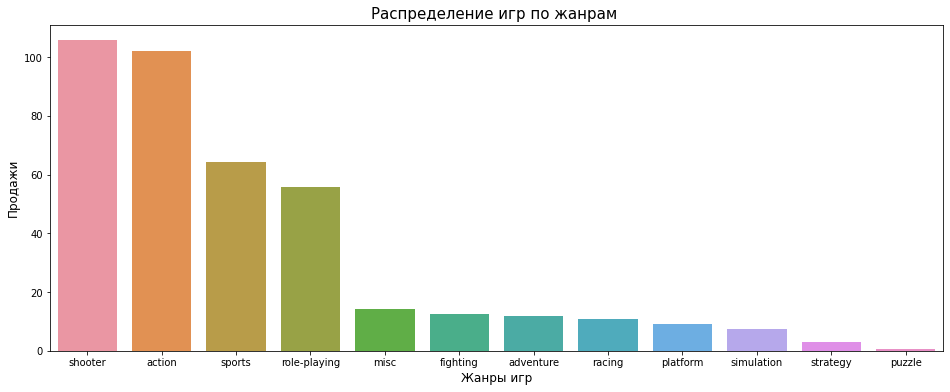

In [103]:
#Построю график распределения игр по жанрам для наглядности
plt.figure(figsize=(16,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

<div class="alert alert-info">
<font color='Blue'> <b>Вывод:</b>
    <p>Самые высокие продажи у жанров action, sports и  shooter, а самые низкие у жанров puzzle, strategy и simulation

In [104]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


In [127]:
genres=df_actual_period['genre'].unique()
genres

array(['shooter', 'sports', 'role-playing', 'action', 'platform',
       'simulation', 'fighting', 'racing', 'adventure', 'misc',
       'strategy', 'puzzle'], dtype=object)

In [128]:
def median_for_each_genre(genres):
    df_tmp=df_actual_period.query('genre == @genres ')
    return df_tmp['total_sales'].median()



In [129]:
medians=[]
for i in genres:
    medians.append(median_for_each_genre(i))
    

In [130]:
print(medians)

[0.38, 0.12, 0.11499999999999999, 0.060000000000000005, 0.09999999999999999, 0.09999999999999999, 0.09, 0.05500000000000001, 0.03, 0.06, 0.05, 0.03]


<AxesSubplot:xlabel='genre', ylabel='median'>

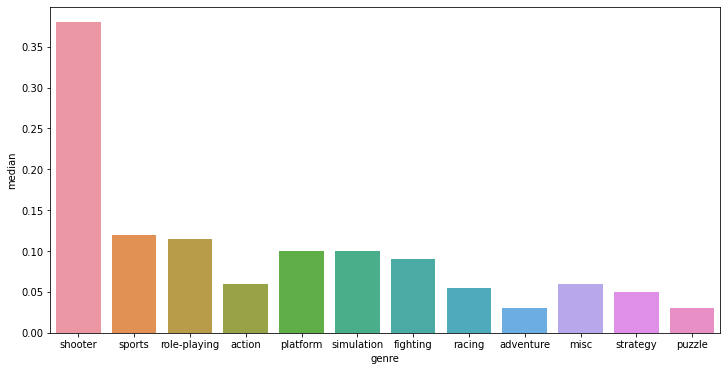

In [131]:
plt.figure(figsize=(12,6))
d = {'genre': genres, 'median': medians}
df_medians = pd.DataFrame(data=d)
df_medians.head()
sns.barplot(data=df_medians, x='genre', y='median')




### 3.1 Вывод

<div class="alert alert-info">
 <font color='Blue'>
     <b>Вывод по исследовательскому анализу данных:</b>
        <p>
- Количество игр начинает расти с 1991 года до 2008-2009 годов, после чего заметно снижение количества игр и стабилизация примерно на одном уровне в 2012-2016 годах. Данные с 1980 по 1990 не сильно менялись и были значительно ниже количества игр с 1991 и для планирования компании на 2017 год эти данные не важны.  <p>
- Самые популярные шесть игровых платформ за актуальный период: ps4, xone, 3ds, wiiu, ps3, pc.  <p>
- Игровые платформы в среднем существуют около 10 лет. Cамые продаваемые платформы это PS2, x360 и PS3. Пик продаж игровых платформ наступает в среднем на 4-6 год после выхода.  <p>
  -  Самые высокие продажи у жанров role-play shooter, sports а самые низкие у жанров puzzle, misc и strategy.  

## 4. Составим-портрет-пользователя-каждого-региона

<div class="alert alert-info">
<font color='Blue'>

   <b>- Определим для пользователя каждого региона (NA, EU, JP):<p>
    - Самые популярные платформы (топ-5). Опишем различия в долях продаж.<p>
    - Самые популярные жанры (топ-5). Поясним разницу.<p>
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?<p></b>
       
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)


<div class="alert alert-info">
<font color='Blue'>

   <b>Портрет пользователя из Северной Америки

In [110]:


    
NA_sales_platform_total=df_actual_period.pivot_table(index=['platform'], values='na_sales',aggfunc='sum')
NA_sales_platform_total=NA_sales_platform_total.reset_index()


NA_sales_genre_total=df_actual_period.pivot_table(index=['genre'], values='na_sales',aggfunc='sum')
NA_sales_genre_total=NA_sales_genre_total.reset_index()

NA_sales_rating_total=df_actual_period.pivot_table(index=['rating'], values='na_sales',aggfunc='sum')
NA_sales_rating_total=NA_sales_rating_total.reset_index()

Text(0, 0.5, 'Продажи')

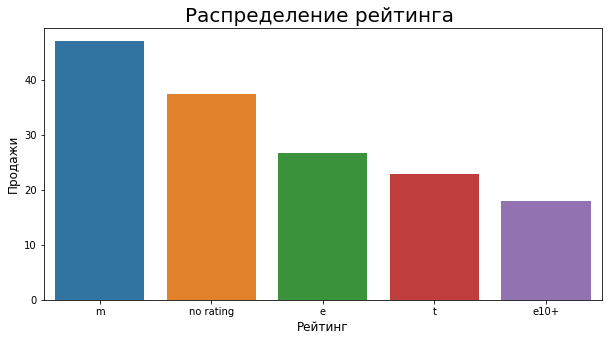

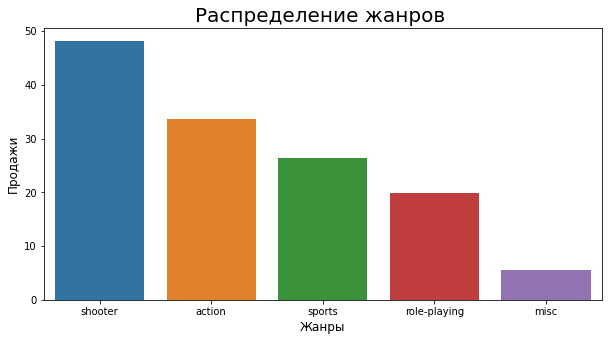

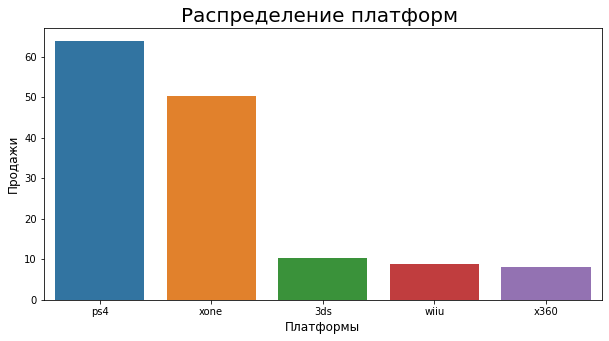

In [112]:
plt.figure(figsize=(10,5))
plt.title('Распределение рейтинга ',fontsize=20)
sns.barplot(data=NA_sales_rating_total.sort_values(by='na_sales',ascending=False).head(5), x='rating', y='na_sales')
plt.xlabel('Рейтинг',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

NA_sales_genre_total.sort_values(by='na_sales',ascending=False).head(5)

plt.figure(figsize=(10,5))
plt.title('Распределение жанров ',fontsize=20)
sns.barplot(data=NA_sales_genre_total.sort_values(by='na_sales',ascending=False).head(5), x='genre', y='na_sales')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

plt.figure(figsize=(10,5))
plt.title('Распределение платформ ',fontsize=20)
sns.barplot(data=NA_sales_platform_total.sort_values(by='na_sales',ascending=False).head(5), x='platform', y='na_sales')
plt.xlabel('Платформы',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

<div class="alert alert-info">
<font color='Blue'> <b>Вывод для Севеорной Америки:</b>
    
   - Самые популярные платформы (топ-5): ps4, xone, 3ds, wiiu и x360<p>
   - Самые популярные жанры (топ-5): shooter, action, sports, role-playing, fighting<p>
   - Влияет ли рейтинг ESRB на продажи в отдельном регионе?: Самые высокие продажи у игр с рейтингом "m - от 17 лет", "t - подростки 13-19 лет",игры без рейтинга ,"e10+ для ввсех старше 10 лет"

<div class="alert alert-info">
<font color='Blue'>

   <b>Портрет пользователя из Европы

In [132]:
#создаю сводные таблицы для отсривоки барплотов


EU_sales_platform_total=df_actual_period.pivot_table(index=['platform'], values='eu_sales',aggfunc='sum')
EU_sales_platform_total=EU_sales_platform_total.reset_index()

EU_sales_genre_total=df_actual_period.pivot_table(index=['genre'], values='eu_sales',aggfunc='sum')
EU_sales_genre_total=EU_sales_genre_total.reset_index()

EU_sales_rating_total=df_actual_period.pivot_table(index=['rating'], values='eu_sales',aggfunc='sum')
EU_sales_rating_total=EU_sales_rating_total.reset_index()


Text(0, 0.5, 'Продажи')

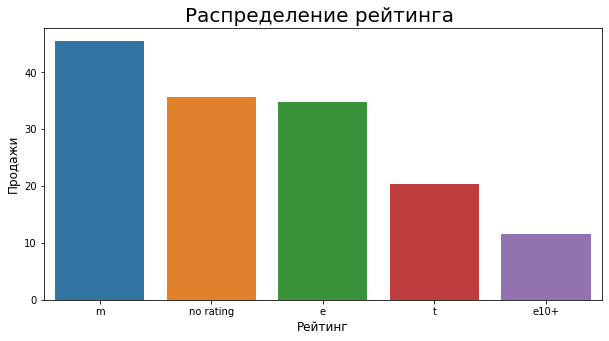

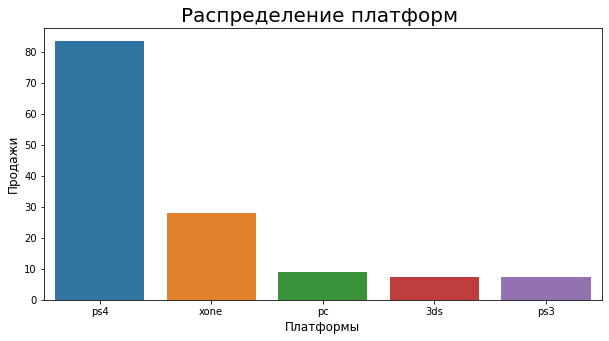

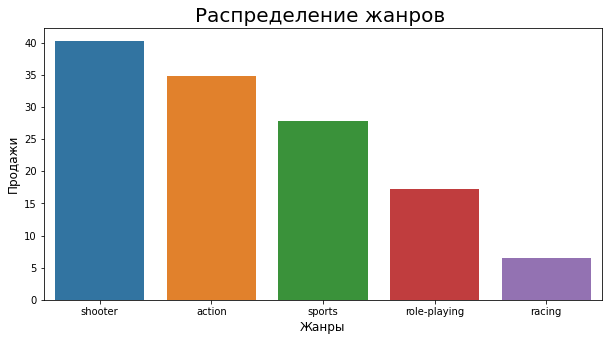

In [115]:
plt.figure(figsize=(10,5))
plt.title('Распределение рейтинга ',fontsize=20)
sns.barplot(data=EU_sales_rating_total.sort_values(by='eu_sales',ascending=False).head(5), x='rating', y='eu_sales')
plt.xlabel('Рейтинг',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

plt.figure(figsize=(10,5))
plt.title('Распределение платформ ',fontsize=20)
sns.barplot(data=EU_sales_platform_total.sort_values(by='eu_sales',ascending=False).head(5), x='platform', y='eu_sales')
plt.xlabel('Платформы',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

EU_sales_genre_total.sort_values(by='eu_sales',ascending=False).head(5)

plt.figure(figsize=(10,5))
plt.title('Распределение жанров ',fontsize=20)
sns.barplot(data=EU_sales_genre_total.sort_values(by='eu_sales',ascending=False).head(5), x='genre', y='eu_sales')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

<div class="alert alert-info">
<font color='Blue'> <b>Вывод для Европы:</b>
    <p>
   - Самые популярные платформы (топ-5): ps4, xone, pc, 3ds и ps3<p>
   - Самые популярные жанры (топ-5): shooter, sports, action, role-playing, racing<p>
   - Влияет ли рейтинг ESRB на продажи в отдельном регионе?: Самые высокие продажи у игр с рейтингом "m - от 17 лет", "е - для всех", "t - подростки 13-19 лет",  без рейтинга и "e10+ для всех старше 10 лет"

<div class="alert alert-info">
<font color='Blue'>

   <b>Портрет пользователя из Японии

In [134]:
#создаю сводные таблицы для отсривоки барплотов
JP_sales_platform=df_actual_period.pivot_table(index=['platform'], values='jp_sales',aggfunc='sum')
JP_sales_platform=JP_sales_platform.reset_index()

JP_sales_genre=df_actual_period.pivot_table(index=['genre'], values='jp_sales',aggfunc='sum')
JP_sales_genre=JP_sales_genre.reset_index()

JP_sales_rating=df_actual_period.pivot_table(index=['rating'], values='jp_sales',aggfunc='sum')
JP_sales_rating=JP_sales_rating.reset_index()

JP_sales_platform_total=df_actual_period.pivot_table(index=['platform'], values='jp_sales',aggfunc='sum')
JP_sales_platform_total=JP_sales_platform_total.reset_index()

JP_sales_genre_total=df_actual_period.pivot_table(index=['genre'], values='jp_sales',aggfunc='sum')
JP_sales_genre_total=JP_sales_genre_total.reset_index()

JP_sales_rating_total=df_actual_period.pivot_table(index=['rating'], values='jp_sales',aggfunc='sum')
JP_sales_rating_total=JP_sales_rating_total.reset_index()

Text(0, 0.5, 'Продажи')

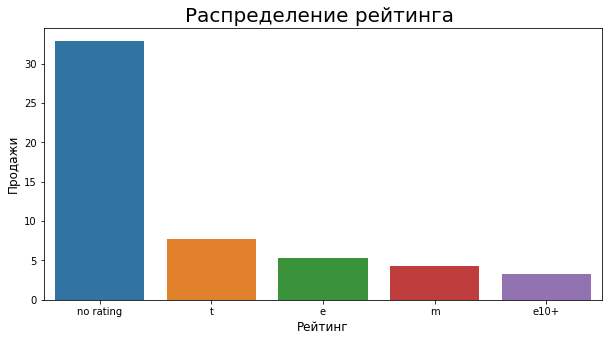

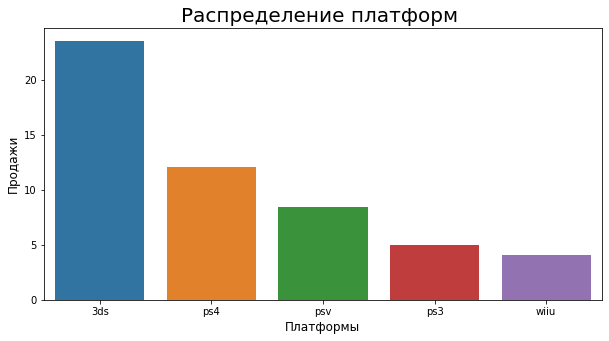

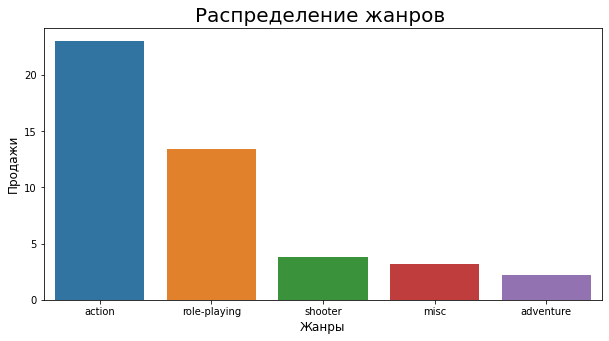

In [135]:
JP_sales_rating_total.sort_values(by='jp_sales',ascending=False).head(5)

plt.figure(figsize=(10,5))
plt.title('Распределение рейтинга ',fontsize=20)
sns.barplot(data=JP_sales_rating_total.sort_values(by='jp_sales',ascending=False).head(5), x='rating', y='jp_sales')
plt.xlabel('Рейтинг',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

JP_sales_platform_total.sort_values(by='jp_sales',ascending=False).head(5)

plt.figure(figsize=(10,5))
plt.title('Распределение платформ ',fontsize=20)
sns.barplot(data=JP_sales_platform_total.sort_values(by='jp_sales',ascending=False).head(5), x='platform', y='jp_sales')
plt.xlabel('Платформы',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

JP_sales_genre_total.sort_values(by='jp_sales',ascending=False).head(5)

plt.figure(figsize=(10,5))
plt.title('Распределение жанров ',fontsize=20)
sns.barplot(data=JP_sales_genre_total.sort_values(by='jp_sales',ascending=False).head(5), x='genre', y='jp_sales')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

<div class="alert alert-info">
<font color='Blue'> <b>Вывод для Японии:</b>
    <p>
   - Самые популярные платформы (топ-5): 3ds, ps4, psv, ps3, wiiu<p>
   - Самые популярные жанры (топ-5): action, role-playing, adventure,shooter, misc<p>
   - Влияет ли рейтинг ESRB на продажи в отдельном регионе?: Самые высокие продажи у игр без рейтинга, с рейтингом "t - подростки 13-19 лет", на втором месте "m - от 17 лет",на третьем месте "е - для всех",  и на четвёртом месте "e10+ для всех старше 10 лет"

<div class="alert alert-info">
 <font color='Blue'>
     <b>Вывод по составлению портрета пользователя каждого региона</b>
     <p>
         Из графиков видно, что интересы пользователей за последний год сильно отличаются от интересов за предыдущие года, поэтому для прогноза на 2017 год лучше использовать данные за последний год, в котором преобладает спрос на игры жанра shooter, для платформы ps4 для пользователей из Европы и Северной Америки, а для пользователей из Японии игры с жанром action на платформе 3ds.

## 5. Проверка гипотез

<div class="alert alert-info">
<font color='Blue'>

   <b>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<p>
       Сформулируем нулевые гипотезы:<p></b>

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <p>
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [139]:
import warnings

warnings.filterwarnings('ignore')
# Сохраним в переменных актуальные данные за последние 10 лет
xone_hyp = df_actual_period[(df['platform']=='xone') & (df_actual_period['year_of_release']>2006)]['user_score']
pc_hyp = df_actual_period[(df_actual_period['platform']=='pc') & (df_actual_period['year_of_release']>2006)]['user_score']

#Посчитаем средний рейтинг пользователя для xbox платформ
xone_hyp.mean()

6.542148760330578

In [120]:
#Посчитаем средний рейтинг пользователя для PC платформ
pc_hyp.mean()

6.296428571428573

In [121]:
#Выполним проверку гипотезы

alpha = .05

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
<font color='Blue'>

   <b>Вывод:</b><p>
  Не можем отвергнуть нулевую гипотезу - слишком высоке значение p-value. Средние пользовательские рейтинги Xbox One и PC - приблизительно одинаковые

<div class="alert alert-info">
<font color='Blue'>

   <b>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные<p>
       Сформулируем нулевые гипотезы:<p></b>

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые<p>
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются
       

In [122]:
# Сохраним в переменных актуальные данные за последние 10 лет
genre_action_hyp = df_actual_period[(df_actual_period['genre']=='action') & (df_actual_period['year_of_release']>2006)]['user_score']
genre_sports_hyp = df_actual_period[(df_actual_period['genre']=='sports') & (df_actual_period['year_of_release']>2006)]['user_score']

#выведем среднюю оценку по жанру экшн
genre_action_hyp.mean()

6.808290155440415

In [123]:
#выведем среднюю оценку по жанру спорт
genre_sports_hyp.mean()

5.198780487804878

In [124]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .05

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


<div class="alert alert-info">
 <font color='Blue'>
     <b>Вывод:</b>
        <p> Отвергаем нулевую гипотезу, так как вероятность получить одинаковые средние рейтинги жанров Action и Sports очень низкая.

## 6. Общий вывод

<div class="alert alert-info">
 <font color='Blue'>
<b>Краткий обзор выполненных работ:  </b><p> 
    Привел данные к нужным типам. Нашёл и исправил ошибки. Обработал пропуски. Заменил названия столбцов, привёл к нижнему регистру. Определили, что аббревиатура TBD значит to be done, поэтому заменил tbd на nan. Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.<p>

<b>Вывод по исследовательскому анализу данных:</b>
        <p>
- Количество игр начинает расти с 1991 года до 2008-2009 годов, после чего заметно снижение количества игр и стабилизация примерно на одном уровне в 2012-2016 годах. Данные с 1980 по 1990 не сильно менялись и были значительно ниже количества игр с 1991 и для планирования компании на 2017 год эти данные не важны.  <p>
- Самые популярные шесть игровых платформ за актуальный период: ps4, xone, 3ds, wiiu, ps3, pc.  <p>
- Игровые платформы в среднем существуют около 10 лет. Cамые продаваемые платформы это PS2, x360 и PS3. Пик продаж игровых платформ наступает в среднем на 4-6 год после выхода.  <p>
- У top_6 платформ присутствует корреляция, между оценками пользователей и критиков к продажам.  <p>
- Оценка критиков сильнее влияет на продаже чем оценка пользователей. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей.  <p>
  -  Самые высокие продажи у жанров platform, shooter, sports а самые низкие у жанров puzzle, adventure и strategy.           
<b>Вывод по составлению портрета пользователя каждого региона:</b>
     <p>
<b>Вывод для Севеорной Америки:</b>
    <p>
    - Самые популярные платформы (топ-5): X360, ps2, wii, ps3 и ds<p>
    - Самые популярные жанры (топ-5): action, sports, shooter, platform, misc<p>
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?: Самые высокие продажи у игр с рейтингом "е - для всех", второе и третье места поделили игры с рейтингом "t - подростки 13-19 лет" и  "m - от 17 лет". <p>

<b> Есть изменения после 2015 года: </b><p>
   - Самые популярные платформы (топ-5): ps4, xone, 3ds, wiiu и pc<p>
   - Самые популярные жанры (топ-5): shooter, action, sports, role-playing, fighting<p>
   - Влияет ли рейтинг ESRB на продажи в отдельном регионе?: Самые высокие продажи у игр с рейтингом "m - от 17 лет", "t - подростки 13-19 лет",игры без рейтинга ,"e10+ для ввсех старше 10 лет"
    
<b>Вывод для Европы:</b>
    <p>
    - Самые популярные платформы (топ-5): , ps2, ps3, x360, wii и ps<p>
    - Самые популярные жанры (топ-5): action, sports, shooter, racing, misc<p>
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?: Самые высокие продажи у игр с рейтингом "е - для всех", второе с рейтингом  "m - от 17 лет", третье место "t - подростки 13-19 лет" и на четвёртом с рейтингом "e10+ для всех старше 10 лет"<p>

<b> Есть изменения после 2015 года: </b><p>
   - Самые популярные платформы (топ-5): ps4, xone, pc, 3ds и wiiu<p>
   - Самые популярные жанры (топ-5): shooter, sports, action, role-playing, racing<p>
   - Влияет ли рейтинг ESRB на продажи в отдельном регионе?: Самые высокие продажи у игр с рейтингом "m - от 17 лет", "е - для всех", "t - подростки 13-19 лет",  и "e10+ для всех старше 10 лет"
     
<b>Вывод для Японии:</b>
    <p>
    - Самые популярные платформы (топ-5): ds, ps, ps2, snes, 3ds<p>
    - Самые популярные жанры (топ-5): role-playing, action, sports, platform, misc<p>
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?: Самые высокие продажи у игр с рейтингом "е - для всех", второе с рейтингом  "t - подростки 13-19 лет", третье место  "m - от 17 лет" и на четвёртом с рейтингом "e10+ для всех старше 10 лет"<p>

<b> Есть изменения после 2015 года: </b><p>
   - Самые популярные платформы (топ-5): ps4, xone, pc, 3ds и wiiu<p>
   - Самые популярные жанры (топ-5): shooter, sports, action, role-playing, racing<p>
   - Влияет ли рейтинг ESRB на продажи в отдельном регионе?: Самые высокие продажи у игр без рейтинга, с рейтингом "t - подростки 13-19 лет", на втором месте "m - от 17 лет",на третьем месте "е - для всех",  и на четвёртом месте "e10+ для всех старше 10 лет"
         
<b>Рекомендации: </b><p>  
    По результату анализа видно, что интересы пользователей за последний год сильно отличаются от интересов за предыдущие года, поэтому для прогноза на 2017 год лучше использовать данные за последний год, в котором преобладает спрос на игры жанра shooter, для платформы ps4 для пользователей из Европы и Северной Америки, а для пользователей из Японии игры с жанром action на платформе 3ds. <p>
   